In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:,[3,4]].values

__________________________________________________________________________________________________________________________________________________________
Ahora vamos a ver como saber el numero optimo de clusters que hay que hacer para nuestro algoritmo de K-MEANS.


In [7]:
# n_cluster =  la cantidad de clusters que se van a generar.
# init = la inicializacion del centroide en los clusters.
# max_iter = numero máximo de iteraciones del algoritmo k-means para una sola ejecución.
# n_init = numero de veces que se ejecuta el algoritmo k-means con semillas de centroide diferentes.
# kmeans.inertia_ = el valor de la suma del cuadrado de una distancia.
from sklearn.cluster import KMeans
wcss = [] # Aca van los resultados de la suma de los cuadrados de la distancia
for i in range(1,11): # Se itera 10 veces
    kmeans = KMeans(n_clusters=i,random_state=0,init="k-means++",max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Visualizacion

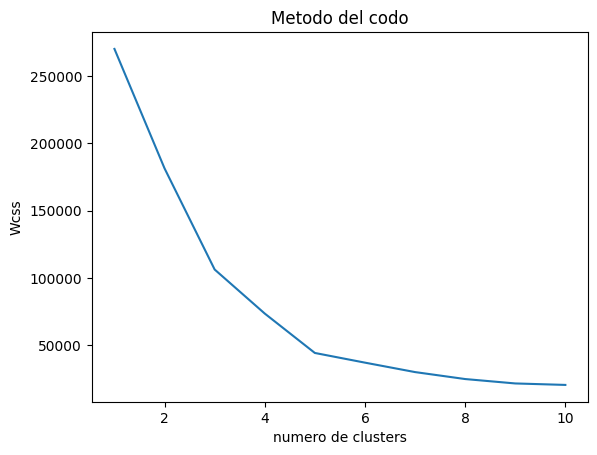

In [9]:
# La grafica del plot funciona asi: plt(x,y)
# vamos a usar como x = range(1,11), el rango de valores de 1 a 10
# vamos a usar como y = wcss, la suma de los cuadrados de las distancias.
plt.plot(range(1,11),wcss)
plt.title("Metodo del codo")
plt.xlabel("numero de clusters")
plt.ylabel("Wcss")
plt.show()

Nuestro valor optimo de cluster analizando la grafica seria 5.
_________________________________________________________________________________________________________________________________________________________

Aplicacion del modelo conociendo el numero optimo de clusters

In [11]:
kmeans = KMeans(n_clusters=5,random_state=0,init="k-means++",max_iter=300,n_init=10)
# Predecimos a que cluster pertenecen los grupos de personas con respecto a su salario y su compra con la tarjeta
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Visualizacion de los clusters

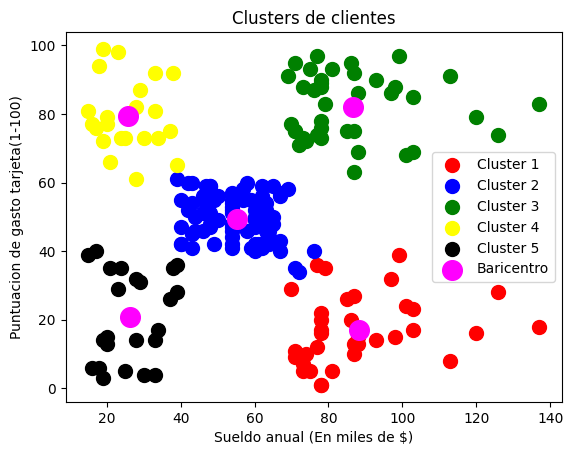

In [17]:
# Sabiendo que tenemos 5 clusters (0,1,2,3,4), representamos cada uno de diferente color

# (X[y_kmeans == 0,0]) = agarramos la matriz X seleccionando las filas donde la prediccion(y_kmeans) corresponde con el cluster 0 y el ultimo 0 representa la primera columna de la matriz X (salario anual)

#X[y_kmeans == 0,1] = la diferencia es que ahora agarramos la segunda columna de la matriz X, osea el gasto con la tarjeta

#X[y_kmeans == 0,0] = x
#X[y_kmeans == 0,1] = y


plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c= "red", label = "Cluster 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c= "blue", label = "Cluster 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c= "green", label = "Cluster 3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c= "yellow", label = "Cluster 4")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c= "black", label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 200, c= "magenta", label = "Baricentro")
plt.title("Clusters de clientes")
plt.xlabel("Sueldo anual (En miles de $)")
plt.ylabel("Puntuacion de gasto tarjeta(1-100)")
plt.legend()
plt.show()

Ahora, para mostrarselo a nuestro cliente o empresa no podemos simplemente ponerle cluster 1 2 3 etc, vamos a asignarle un
nombre a cada cluster.

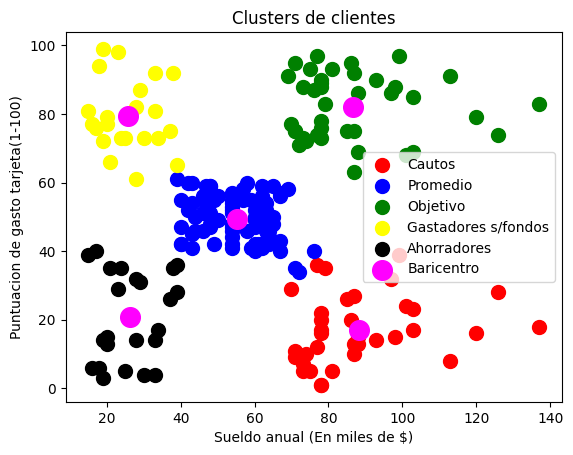

In [19]:

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c= "red", label = "Cautos")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c= "blue", label = "Promedio")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c= "green", label = "Objetivo")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c= "yellow", label = "Gastadores s/fondos")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c= "black", label = "Ahorradores")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 200, c= "magenta", label = "Baricentro")
plt.title("Clusters de clientes")
plt.xlabel("Sueldo anual (En miles de $)")
plt.ylabel("Puntuacion de gasto tarjeta(1-100)")
plt.legend()
plt.show()